# Prediction using Supervised Machine Learning

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

#import Data
csv_url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(csv_url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Plotting Distribution of Hours & Scores

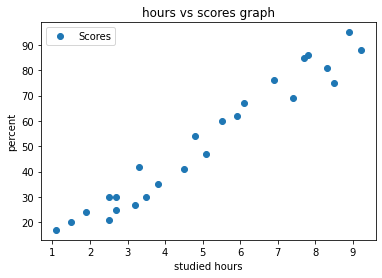

In [38]:
#Plot the data points of scores vs hours to discover relationship between the two
df.plot(x="Hours",y="Scores",style="o")
plt.title("hours vs scores graph")
plt.xlabel("studied hours")
plt.ylabel("percent")
plt.show()

# Data Visualization

array([[<AxesSubplot:title={'center':'Hours'}>,
        <AxesSubplot:title={'center':'Scores'}>]], dtype=object)

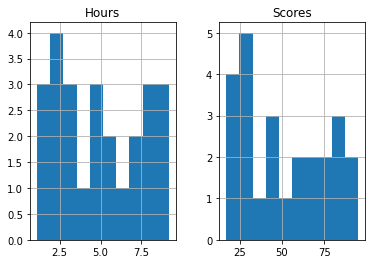

In [17]:
df.hist()

# Dividing Data into Attributes

In [41]:
#Shows positive relationship
#devide data into attributes and labels

#x:array of values in "Hours" column
x=df.iloc[:,:1].values

#y:array of values in "Scores" column
y=df.iloc[:,1].values

print(x, y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]] [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Splitting of data into the training and test sets

In [26]:
#split into train and test sets
from sklearn.model_selection import train_test_split

# 70% data for training purpose and rest 30% data for testing purpose
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# Model Training

In [56]:
from sklearn.linear_model import LinearRegression

linR= LinearRegression()
linR.fit(x_train,y_train)

# Evaluating the model on Training Data

In [57]:
from sklearn import metrics

y_train_pred=linR.predict(x_train)

print("R Square:", metrics.r2_score(y_train,y_train_pred))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_train,y_train_pred))
print("Mean sqare Error:", metrics.mean_squared_error(y_train,y_train_pred,squared=False))

R Square: 0.9484997422695115
Mean Absolute Error: 5.247062033143277
Mean sqare Error: 5.627830870119196


# Plotting of test data

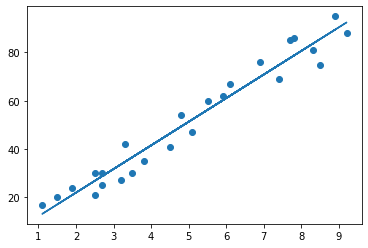

In [42]:
#Regression line
Rline= linR.coef_*x + linR.intercept_

#Plotting the test data and Regression line
plt.scatter(x,y)
plt.plot(x,Rline)
plt.show()

# Predicting the scores for the model

In [46]:
#Predicting on trained model
print(x_test)

#testing data in hours
y_pred=linR.predict(x_test)
#Predicting scores of testing data of hours on the basis of trained model

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


# Comparing Actual Vs Predicted Model

In [53]:
#Compare the actual values and predicted values
comp = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comp.describe()

,Actual,Predicted
count,8.000000,8.000000
mean,44.125000,43.972224
std,24.654397,24.175976
min,20.000000,17.053665
25%,26.250000,25.373947
50%,32.500000,36.630799
75%,63.750000,63.794071
max,86.000000,78.721636


# Testing & Prediction Score for 9.25 hrs/ day study

In [48]:
# Predicted score if a student studies for 9.25 hrs/ day
hours=9.25
pred = linR.predict([[hours]])
print ("No. of Hours:{}".format(hours))
print ("Predicted score:{}".format(pred[0]))

No. of Hours:9.25
Predicted score:92.91505723477056


# Evaluating the model on test data

In [55]:
print("R Square:", metrics.r2_score(y_test,y_pred))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred))
print("Mean sqare Error:", metrics.mean_squared_error(y_test,y_pred,squared=False))

R Square: 0.9568211104435257
Mean Absolute Error: 4.419727808027652
Mean sqare Error: 4.792191274636315


In [58]:
# R-Square raw Programming

SS_res = sum((y_test - y_pred)**2)
SS_total = sum((y_test - np.mean(y_test))**2)
1 - (SS_res/SS_total)

0.9568211104435257

#                      Thank You